# Data Description
The data contains 108956 training images and 8078 test images. In each dataset (train or test) the data is split into several runs, corresponding to the continuous runs of the robot collecting the data.

The run folders are named run00, run01, etc. Each folder contains a file with the actions called actions.npy, and images img_0000.jpg, img_0001.jpg, etc. The images are all size $240 \times 240 \times 3$, cropped and scaled from a Kinect.

If the run was of $N$ actions, then there are $N+1$ images in the folder and actions.npy is an array of size $N\times5$. Each action contains these 5 elements: $$(p_x, p_y, \theta, l, g)$$

where:

$p_x$ = x-coordinate of the action in pixels. These are scaled with the images so they could be fractional.

$p_y$ = y-coordinate of the action in pixels

$\theta$ = angle of the action in radians, in world space increasing clockwise with 0 pointing left.

$l$ = length of the action in meters, $l \in [0.01, 0.05]$

$g$ = a Boolean value indicating whether the action should be used for training. If 0, it indicates that there was an issue planning or executing the intended trajectory.

The data is loaded and visualized below. Note that $\theta$ and $l$ are used to plot actions in the images, but in fact they are in world space, not image space.

In [1]:
import numpy as np
import glob
import scipy.ndimage
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
runs = sorted(glob.glob("train/*"))
print("number of training runs", len(runs))

number of training runs 41


In [5]:
# some plotting utilities
def rect(ax, poke, c):
    x, y, t, l, good = poke
    dx = -200 * l * math.cos(t)
    dy = -200 * l * math.sin(t)
    ax.arrow(x, y, dx, dy, head_width=5, head_length=5)

def plot_sample(img_before, img_after, action):
    plt.figure()
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img_before.copy())
    rect(ax1, action, "blue")
    ax2.imshow(img_after.copy())

run train/run_12 actions: (2498, 5)


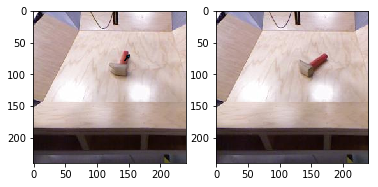

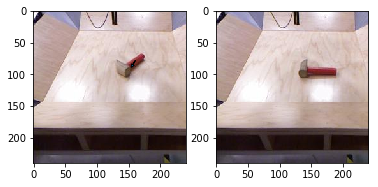

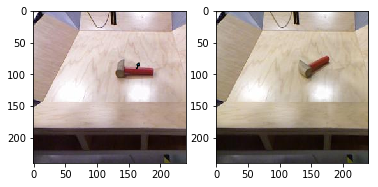

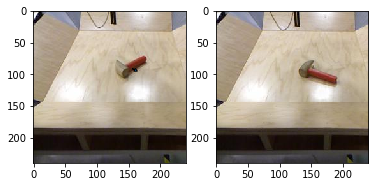

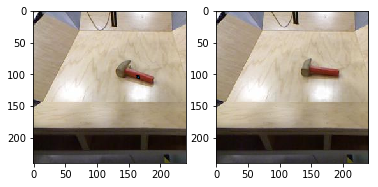

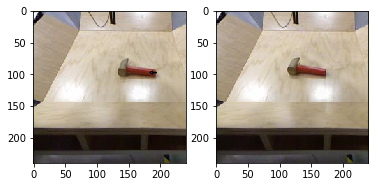

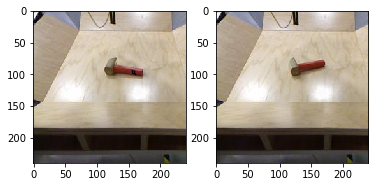

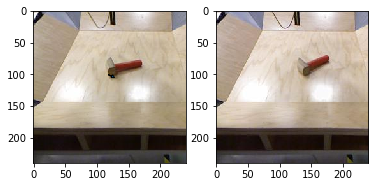

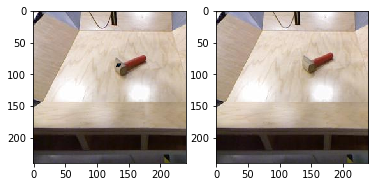

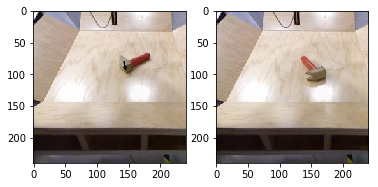

In [6]:
R = 12 # run to inspect
N = 10 # show first N samples

run = runs[R]
img_after = None
actions = np.load(run + "/actions.npy")
print("run", run, "actions:", actions.shape)
for i in range(N):
    img_before = scipy.ndimage.imread(run + "/img_%04d.jpg"%i)
    img_after = scipy.ndimage.imread(run + "/img_%04d.jpg"%(i+1))
    plot_sample(img_before, img_after, actions[i, :])